## Activity 3.2 - Bank customer segmentation using many dimensions

**Steps -** 
1. Create a copy of the dataset named 'bank_scaled', and on it perform standard scaling of the following columns - 
     - 'Income', 'CCAvg', 'Age', 'Experience', 'Mortgage'
2. Get a descriptive summary of the processed columns to verify that the scaling has been applied correctly.
3. Perform k-means clustering  specifying 3 clusters using the scaled features. Specify random_state as 42.
4. Using PCA on the scaled columns, create new columns 'pc1' and 'pc2' containing the data for PC1 and PC2 respectively.
5. Visualize the clusters by using different markers and colours for the clusters on a scatterplot between 'pc1' and 'pc2'
6. Understanding the clusters - clustering criterion:
 - Print the avg. values of the features used for clustering against the three clusters
 - Which features are the most differentiated for the clusters?
7. Understanding the clusters - using other relevant features:**
 - Print the average values against the clusters for the features Age, Mortgage, Family, CreditCard, Online, Personal Loan
 - Which cluster has the highest propensity for taking a personal loan?
8. Based on your understanding of the clusters, assign descriptive lables for the clusters.

#### Solution
**1. Create a copy of the dataset named 'bank_scaled', and on it perform standard scaling of the following columns -**  
- **'Income', 'CCAvg', 'Age', 'Experience', 'Mortgage'**

In [16]:
bank_scaled = bank0.copy()

cluster_cols = ['Income', 'CCAvg', 'Age', 'Experience', \
                'Mortgage']

bank_scaled[cluster_cols] = scaler.fit_transform(bank_scaled[cluster_cols])

**2. Get a descriptive summary of the processed columns to verify that the scaling has been applied correctly.**

In [17]:
bank_scaled[cluster_cols].describe()

,Income,CCAvg,Age,Experience,Mortgage
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,1.939449e-16,-2.078338e-17,2.478018e-17,-1.693312e-16,2.810197e-16
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.428969e+00,-1.108987e+00,-1.948906e+00,-2.014911e+00,-5.555239e-01
25%,-7.554825e-01,-7.084116e-01,-9.019702e-01,-8.812043e-01,-5.555239e-01
50%,-2.123482e-01,-2.506106e-01,-2.952359e-02,-9.121982e-03,-5.555239e-01
75%,5.263146e-01,3.216407e-01,8.429230e-01,8.629604e-01,4.375576e-01
max,3.263712e+00,4.613525e+00,1.889859e+00,1.996667e+00,5.688108e+00


**3. Perform k-means clustering  specifying 3 clusters using the scaled features. Specify random_state as 42.**

In [18]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(bank_scaled[cluster_cols])

bank_scaled['Cluster'] = model.predict(bank_scaled[cluster_cols])

**4. Using PCA on the scaled columns, create new columns 'pc1' and 'pc2' containing the data for PC1 and PC2 respectively.**

In [19]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca_res = pca.fit_transform(bank_scaled[cluster_cols])

bank_scaled['pc1'] = pca_res[:,0]
bank_scaled['pc2'] = pca_res[:,1]

**5. Visualize the clusters by using different markers and colours for the clusters on a scatterplot between 'pc1' and 'pc2'**

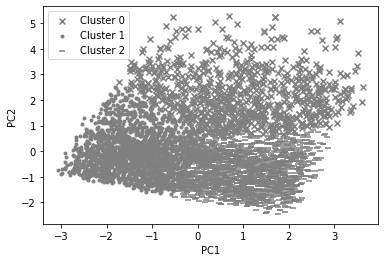

In [26]:
markers = ['x', '.', '_']

for clust in range(3):
    temp = bank_scaled[bank_scaled.Cluster == clust]
    plt.scatter(temp.pc1, temp.pc2, marker=markers[clust], \
                label="Cluster "+str(clust), \
                color = 'gray')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

**6. To understand the clusters better, print the avg. values of the original features used for clustering against the three clusters. Which features are the most differentiated for the clusters?**

In [19]:
bank0['Cluster'] = bank_scaled.Cluster

bank0.groupby('Cluster')[cluster_cols].mean()

,Income,CCAvg,Age,Experience,Mortgage
Cluster,,,,,
0,147.650185,4.856403,43.672435,18.644005,116.279357
1,58.941774,1.367514,55.536044,30.233826,45.134935
2,60.124322,1.382121,35.116428,9.873705,44.771584


**7. To understand the clusters better using other relevant features, print the average values against the clusters for the features Age, Mortgage, Family, CreditCard, Online, Personal Loan. Which cluster has the highest propensity for taking a personal loan?**

In [20]:
sel_cols = ['Income', 'CCAvg', 'Age', 'Experience', 'Mortgage', 'Family', 'CreditCard', 'Online', 'Personal Loan']

bank0.groupby('Cluster')[sel_cols].mean()

,Income,CCAvg,Age,Experience,Mortgage,Family,CreditCard,Online,Personal Loan
Cluster,,,,,,,,,
0,147.650185,4.856403,43.672435,18.644005,116.279357,2.002472,0.299135,0.613103,0.398022
1,58.941774,1.367514,55.536044,30.233826,45.134935,2.397874,0.300370,0.604898,0.039741
2,60.124322,1.382121,35.116428,9.873705,44.771584,2.552047,0.285150,0.581648,0.035520


Clusters are different on different parameters. But it looks like the clusters 1 and 2 have very similar propensity to go for a personal loan.

**8. Based on your understanding of the clusters, assign descriptive lables for the clusters.**

Key differentiating features for the clusters are - 
- Age
- Income, CCAvg, Mortgage follow similar patterns for the clusters

Some basic labels for these clusters can be - 

* Cluster 0: Middle aged spenders (high income, high spend)
* Cluster 1: Old low spend potential
* Cluster 2: Young low spend potential